In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from modules.asset import Asset


In [2]:
start_date = "2015-01-01"
end_date = "2020-01-01"
tick_type = "Close"

swiss_re = Asset(
    asset_name="SwissRe",
    tick_name="SREN.SW",
    time_period=(start_date, end_date),
    value_type=tick_type
)
bitcoin = Asset(
    asset_name="Bitcoin",
    tick_name="BTC-USD",
    time_period=(start_date, end_date),
    value_type=tick_type
)

/Users/emiliomaddalena/Documents/github/volatility-forecasting/modules/asset.py:26: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(self.tick_name, start=self.start_date, end=self.end_date)
[*********************100%***********************]  1 of 1 completed
/Users/emiliomaddalena/Documents/github/volatility-forecasting/modules/asset.py:26: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(self.tick_name, start=self.start_date, end=self.end_date)
[*********************100%***********************]  1 of 1 completed


In [3]:
def plot_assets(assets: Asset, series_type: str) -> None:
    """Plot the time series data for a list of assets, individual plots."""
    for asset in assets:
        series = asset.__getattribute__(series_type)
        series.plot(figsize=(10, 7), color="k", legend=False)

        years = pd.date_range(start=series.index[0], end=series.index[-1], freq="YS").year
        years = np.unique(np.concatenate(([series.index[0].year], years, [series.index[-1].year + 1])))
        ticks = [pd.Timestamp(year=year, month=1, day=1) for year in years]
        plt.title(f"{asset.asset_name} ({asset.tick_name})")
        plt.xlabel("Date")
        plt.ylabel("Price")
        plt.xlim([series.index[0], series.index[-1]])
        plt.xticks(ticks=ticks, labels=[str(year) for year in years], rotation=45)
        plt.grid()

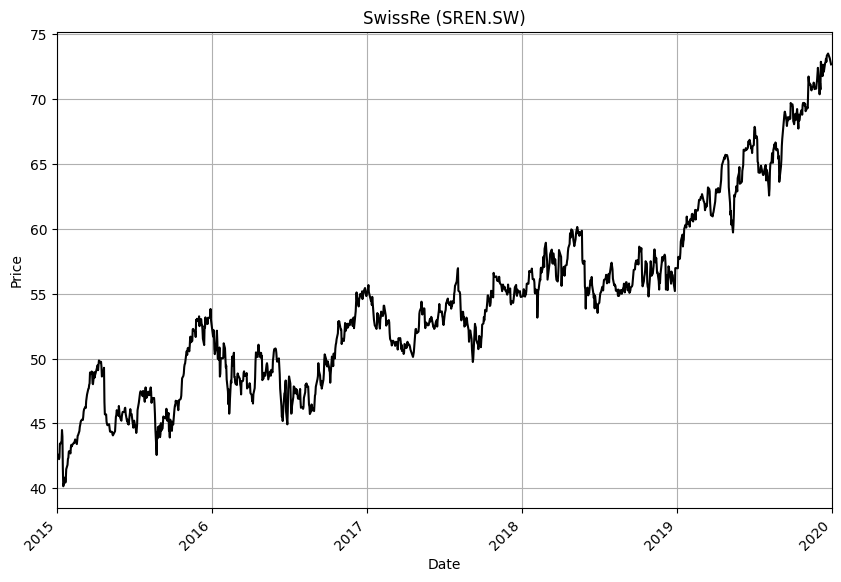

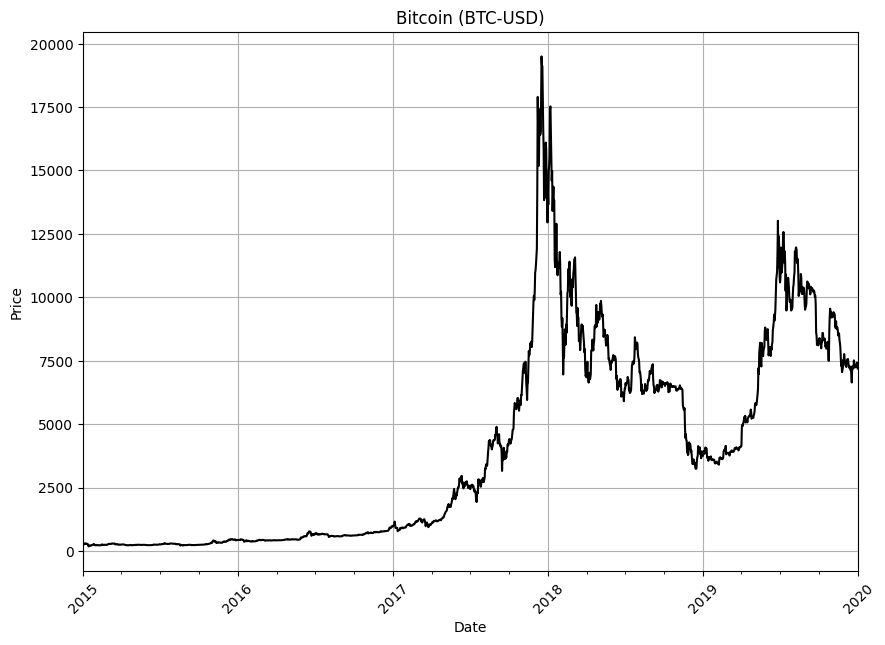

In [4]:
plot_assets([swiss_re, bitcoin], "price")

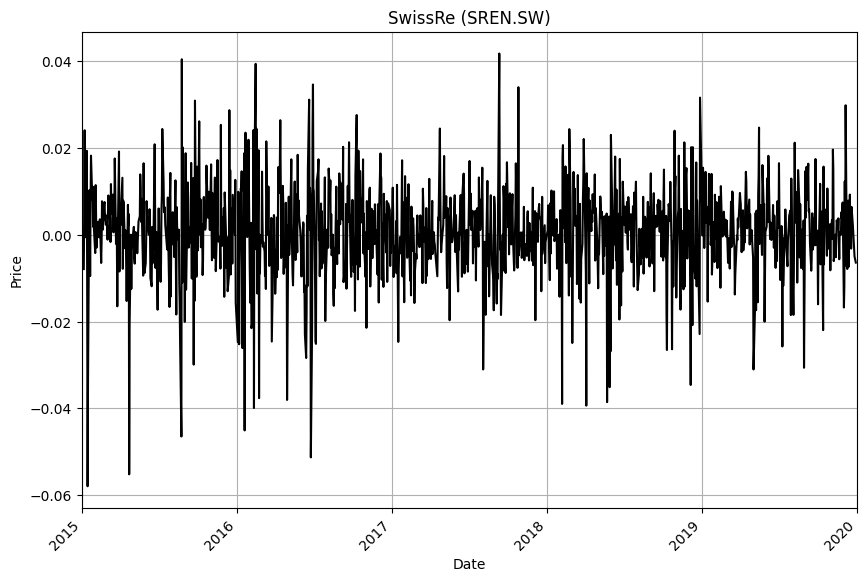

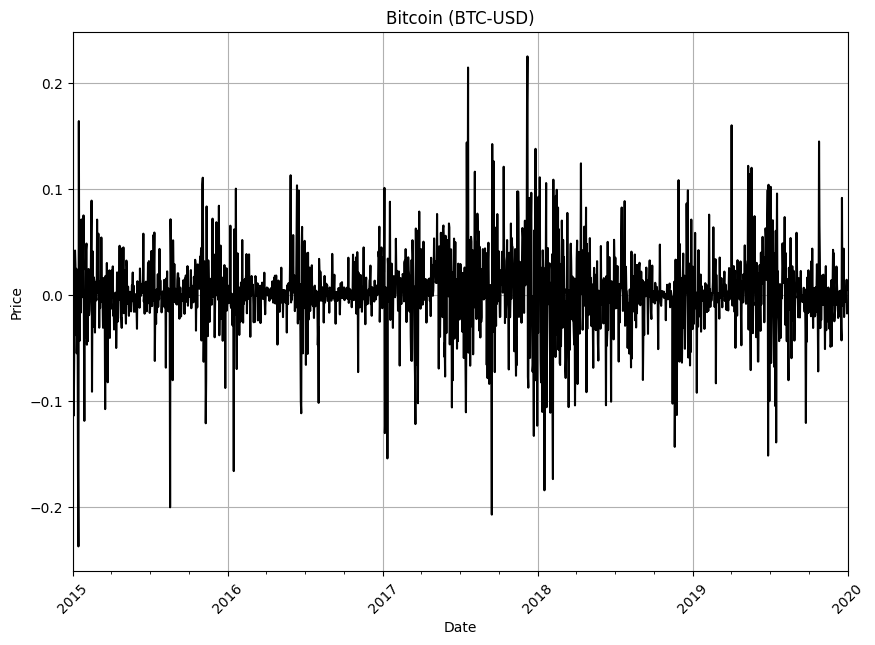

In [5]:
plot_assets([swiss_re, bitcoin], "returns")